# Svensson (1994)

We can use the genetic algorithm to optimize a simple equation, such as the one below.

$$ r(t) = \beta_1 + \beta_2\frac{1-e^{-\lambda_1 t}}{\lambda_1 t} 
        + \beta_3 \left(\frac{1-e^{-\lambda_1 t}}{\lambda_1 t}-e^{-\lambda_1 t}\right)
        + \beta_4 \left(\frac{1-e^{-\lambda_2 t}}{\lambda_2 t}-e^{-\lambda_2 t}\right)$$

### Importing the data

In [51]:
from scipy.optimize import fmin
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from workadays import workdays as wd

path = r"C:\Users\Alysson\Documents\GitHub\Monetary-Shocks\Brasil\ETTJ\Base_LTN.xlsx"
path2 = r"C:\Users\Alysson\Documents\GitHub\Monetary-Shocks\Brasil\ETTJ\Parametros.xlsx"
df = pd.read_excel(path)
parameters = pd.read_excel(path2)

In [52]:
parameters.set_index("Data referência", inplace=True)
df["Maturity"] = df.apply(lambda row: wd.networkdays(row["DATA_REFERENCIA"], row["DATA_VENCIMENTO"]), axis=1)/252
df.set_index("DATA_REFERENCIA", inplace=True)

### Generating individuals

In [92]:
### 1 - Initial Values of the results of the estimation of the previous day

ref_date_str = "2023-07-27"
ref_date = datetime.strptime(ref_date_str, "%Y-%m-%d")
previous_date = ref_date - timedelta(days=1)
previous_parameters = parameters.loc[previous_date][1:]

### 2 - Approximation that takes into account the observed yield to maturity

data_estimada = df.loc[ref_date_str]
data_estimada.sort_values("Maturity")
b1 = data_estimada["EXPECTATIVA"][0]/100
b2 = data_estimada["EXPECTATIVA"][-1]/100 - data_estimada["EXPECTATIVA"][0]/100
b3 = 0
b4 = 0
lbda1 = (data_estimada["Maturity"][-1]-data_estimada["Maturity"][0])/2
lbda2 = lbda1
approx_parameters = np.array([b1, b2, b3 , b4, lbda1, lbda2])

### Generation 

N = 1200     ### Number of individuals 
p = 2/3      ## Proportion of individuals generated by method 1


In [12]:
def svensson(b1, b2, b3, b4, lambda_1, lambda_2,t):
    return b1+b2*(1/(lambda_1*t))*(1-np.exp(-lambda_1*t))+b3*((1/(lambda_1*t))*(1-np.exp(-lambda_1*t))-np.exp(-lambda_1*t))+b4*((1/(lambda_1*t))*(1-np.exp(-lambda_1*t))-np.exp(-lambda_1*t))

t_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
price_list = [98.5, 97.16, 93.97, 90.91, 91.19, 84.91, 84.09, 79.97, 77.06, 107.97]
coupon_list = [0.750, 0.125, 0.625, 0.125, 0.375, 0.125, 0.500, 0.375, 0.250, 4.250]
SC = []

for t in range(10):
    dif = 100/(1+coupon_list[t])**t_list[t]
    SC.append(dif)

SC

[57.142857142857146,
 79.01234567901234,
 23.30450614474283,
 62.42950769699741,
 20.346349914002396,
 49.327018427257215,
 5.852766346593507,
 7.826695083372822,
 13.4217728,
 6.286471716257376e-06]

10

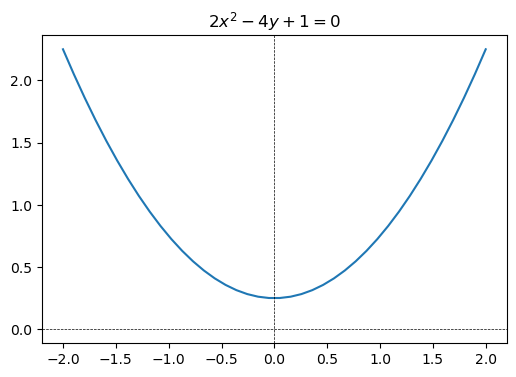

In [87]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(-2, 2, 40)
y_vals = (2*x_vals**2 + 1) / 4
plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals)
plt.title('$2x^2 - 4y + 1 = 0$')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.show()


In [69]:
import random

In [132]:
def function(x,y):
    return 2*x**2 - 4*y +1

def fitness(x,y):
    ans = function(x,y)

    if ans == 0:
        return 99999
    else:
        return abs(1/ans)
    
# generate individuals

solutions = []
for s in range(1000):    
    solutions.append((random.uniform(-10,10),
                      random.uniform(-10,10)))

for i in range(10000):
    rankedsolutions = []
    for s in solutions:
        rankedsolutions.append((fitness(s[0],s[1]),s))
    rankedsolutions.sort(reverse=True)
    #print(f"===Gen{i} best solutions ==")
    #print(rankedsolutions[0])
    
    if abs(rankedsolutions[0][0])>9999:
        break
  
    ## pega as 100 melhores solucoes
    
    bestsolutions = rankedsolutions[:100]
    
    elements = []
    for s in bestsolutions: 
        elements.append(s[1][0])
        elements.append(s[1][1])
    print(elements)    
    ## nova geracao     
    newGen = []    
    for _ in range(1000):
        e1 =  random.choice(elements)*random.uniform(0.99,1.01)
        e2 =  random.choice(elements)*random.uniform(0.99,1.01)
                                                         
        newGen.append((e1,e2))
        
    solutions = newGen
    print(len(solutions))


[1.1000207111355493, 0.8534903133287131, 3.24575496397407, 5.4664276190129755, 2.530188286067574, 3.360617220028608, 0.6655731378609708, 0.5652149302885441, 1.5073943225069115, 1.5068946667691652, 2.677602118835283, 3.956013567071464, -1.5858601930847342, 1.6395705177912525, -3.0556494657491706, 4.764206401686657, -4.355510354003909, 9.580483082482512, -3.972505175469225, 7.9785423566194, 3.920269454200117, 7.670433753898799, -2.51038938678602, 3.1333510901601773, -3.9242486599597264, 7.681362597120412, 0.805724876660296, 0.8579126533926544, -0.23956016654201306, 0.5657656538667393, -0.0975883624973779, -0.04619680357948397, 0.02138839710515228, -0.08847812172269442, -2.55123204095673, 3.8724808531900585, 0.6130835811687092, 0.81002717707619, 2.8783919906616884, 4.77744665323778, 1.015689764566348, 0.3740858153850528, 1.6694994732174813, 2.059445275375113, 1.3303154155825148, 1.5579112203262557, -1.166850393222747, 1.3656414962316497, -0.9321306261976314, 1.127659011995096, 1.148991582

In [120]:
def function(x,y):
    return 2*x**2 - 4*y +1

def fitness(x,y):
    ans = 2*x-1

    if ans == 0:
        return 99999
    else:
        return abs(1/ans)

# generate solutions

solutions = []
for s in range(1000):    
    solutions.append((random.uniform(-10,10),
                      random.uniform(-10,10)))
print(solutions[:5])

[(0.3190571551846375, -7.827539679931181), (-2.7919403067118775, -3.302339527095577), (-6.823337913782339, -4.73350013639825), (0.8887419229451226, 2.814201751928607), (-1.6145548389577513, 8.957328902061267)]


In [119]:
x = round(0.5000143439252724,5)
y = round(7.961359303123863,5)

round(2*x**2 - 4*y +1,3)

-30.345

In [62]:
def function(x,y,z):
    return -2*x**3 + 4*y**2 - 5*z 

def fitness(x,y,z):
    ans = function(x,y,z)
    
    if ans == 0:
        return 99999
    else:
        return abs(1/ans)

# generate solutions

solutions = []
for s in range(1000):    
    solutions.append((random.uniform(0,10000),
                      random.uniform(0,10000),
                      random.uniform(0,10000)))

for i in range(10000):
    rankedsolutions = []
    for s in solutions:
        rankedsolutions.append((fitness(s[0],s[1],s[2]),s))
    rankedsolutions.sort()
    rankedsolutions.reverse()
    print(f"===Gen{i} best solutions ==")
    print(rankedsolutions[0])
    
    if abs(rankedsolutions[0][0])>9999:
        break
        
    bestsolutions = rankedsolutions[:100]
        
    elements = []
    for s in bestsolutions: 
        elements.append(s[1][0])
        elements.append(s[1][1])
        elements.append(s[1][2])
        
    newGen = []
        
    for _ in range(1000):
        e1 =  random.choice(elements)*random.uniform(0.99,1.01)
        e2 =  random.choice(elements)*random.uniform(0.99,1.01)
        e3 =  random.choice(elements)*random.uniform(0.99,1.01)
                                                         
        newGen.append((e1,e2,e3))
        
    solutions = newGen


===Gen0 best solutions ==
(1.0300991515197965e-05, (213.45942752036274, 2202.0972918796942, 8296.083215983099))
===Gen1 best solutions ==
(6.360026644713057e-05, (41.904883722469975, 216.92349347799797, 5065.48721066269))
===Gen2 best solutions ==
(0.0018286081600277849, (3.932870685773107, 17.573030233441756, 331.8892896216392))
===Gen3 best solutions ==
(0.03344421754542689, (11.818443731297423, 30.73257180636633, 89.11332334124371))
===Gen4 best solutions ==
(0.058067263803526135, (3.9711264181997907, 17.425805380618005, 221.1216167051862))
===Gen5 best solutions ==
(1.6326049023629534, (3.9513920372512983, 31.271960799001345, 757.3478998583413))
===Gen6 best solutions ==
(0.015246632963215538, (3.9735210415076647, 9.384577798276243, 32.043628006378185))
===Gen7 best solutions ==
(0.015463440164126877, (3.7917909156047425, 4.021665847798385, 3.865909484339665))
===Gen8 best solutions ==
(0.015482192763878163, (3.7809637796719064, 4.00920517798945, 3.9564576487093244))
===Gen9 best s

===Gen91 best solutions ==
(142.37904003252106, (3.3235553461694156, 4.748288514834887, 3.153576042415806))
===Gen92 best solutions ==
(7.694223922594084, (3.258274091226117, 4.64455999052527, 3.1951651505611998))
===Gen93 best solutions ==
(21.834992585346086, (3.2329329662177386, 4.797240799161437, 4.685596454388904))
===Gen94 best solutions ==
(23.6170633421279, (3.1202519182096613, 4.6220589749592085, 4.74773762303042))
===Gen95 best solutions ==
(367.11196596011496, (3.2307746781470854, 4.600427137583879, 3.2415913918101893))
===Gen96 best solutions ==
(29.84975295238388, (3.2623006379960193, 4.65954698292415, 3.288051268546191))
===Gen97 best solutions ==
(226.72851217744338, (3.237457445539804, 4.610478206824679, 3.2314394601423206))
===Gen98 best solutions ==
(58.039989982880236, (3.2698443590692463, 4.6673645347031325, 3.2465630682544258))
===Gen99 best solutions ==
(466.37610603962366, (3.263702611404532, 4.641465960149153, 3.129329947051648))
===Gen100 best solutions ==
(83.

===Gen201 best solutions ==
(1056.8546198658646, (3.190263918693675, 4.529749538972333, 3.2271672871812633))
===Gen202 best solutions ==
(745.8266588991022, (3.1434930423481084, 4.442214722042201, 3.1618538760893053))
===Gen203 best solutions ==
(49.69798925938741, (3.1475935241413224, 4.649657196903114, 4.625755969820466))
===Gen204 best solutions ==
(2584.6564950988177, (3.1510368236953354, 4.643268035161429, 4.533328293104144))
===Gen205 best solutions ==
(26.15374803646419, (3.2371183572977693, 4.597860224765947, 3.135986352738696))
===Gen206 best solutions ==
(182.08185636258165, (3.1615503300499133, 4.473837042757718, 3.172888028653561))
===Gen207 best solutions ==
(34.94401255845882, (3.1552467624293574, 4.665231307758828, 4.652302649269986))
===Gen208 best solutions ==
(13.62757104903583, (3.096181165325569, 4.571112925344617, 4.628967144446389))
===Gen209 best solutions ==
(21.444701513594204, (3.086133978317797, 4.544484424339456, 4.573986056355681))
===Gen210 best solutions 

===Gen302 best solutions ==
(78.3432053130119, (3.1675412057303234, 4.478498397827956, 3.135732810745326))
===Gen303 best solutions ==
(47.31097013297912, (3.1890558075739333, 4.514538066233126, 3.1358933340823856))
===Gen304 best solutions ==
(19.762142231444155, (3.124225436005806, 4.584570244945829, 4.4065505265407))
===Gen305 best solutions ==
(128.9297944402696, (3.113250736421288, 4.5763579893569, 4.483029137432993))
===Gen306 best solutions ==
(44.06849950397998, (3.243719768436093, 4.608969833924823, 3.1468189462226834))
===Gen307 best solutions ==
(117.46547970150691, (3.185098741276384, 4.517514180704007, 3.1997001986816187))
===Gen308 best solutions ==
(94.5088236925763, (3.1557609104429445, 4.46460962635847, 3.1772368090409637))
===Gen309 best solutions ==
(61.65219636428631, (3.170265368804701, 4.497366135509092, 3.239080264534283))
===Gen310 best solutions ==
(51.54848119134373, (3.144603173134083, 4.629467651276475, 4.50349672971119))
===Gen311 best solutions ==
(44.7294

===Gen386 best solutions ==
(19.666571449586975, (3.1613666680106594, 4.462794590022419, 3.0848770176719635))
===Gen387 best solutions ==
(309.4389499851406, (3.191213181957392, 4.520927689545191, 3.152152282417815))
===Gen388 best solutions ==
(37.36515349216156, (3.0843447565914563, 4.34054490937257, 3.1301375869289467))
===Gen389 best solutions ==
(129.14878305655702, (3.1714786075020123, 4.492730204028853, 3.189404777845886))
===Gen390 best solutions ==
(511.69611337583393, (3.163553986285744, 4.468809854606106, 3.1113856197492944))
===Gen391 best solutions ==
(433.3876680953185, (3.0134648563850273, 4.429462119012767, 4.550495097683438))
===Gen392 best solutions ==
(15.821563974747606, (3.09420501561697, 4.534109645994015, 4.409464114141858))
===Gen393 best solutions ==
(35.37908621577044, (3.076530529850496, 4.519272698054658, 4.485613583330964))
===Gen394 best solutions ==
(103.0600768178309, (3.1610841965413132, 4.471378164219509, 3.157843052779871))
===Gen395 best solutions ==

===Gen485 best solutions ==
(375.4646321714518, (3.040316129968296, 4.471132289846499, 4.55099466866048))
===Gen486 best solutions ==
(20.958797323615613, (3.042831837013207, 4.484002155932614, 4.606258025824351))
===Gen487 best solutions ==
(194.4168540963187, (3.104942687912516, 4.573305073377804, 4.55757671243319))
===Gen488 best solutions ==
(111.54253782046123, (3.095796508809762, 4.548896629414174, 4.484184358333489))
===Gen489 best solutions ==
(24.666330406499462, (3.078554074960384, 4.521499524780961, 4.4924820026561365))
===Gen490 best solutions ==
(9.887575166317914, (3.076651387111935, 4.501083972767951, 4.37886625876879))
===Gen491 best solutions ==
(1563.970312143365, (3.1256462847348394, 4.59157576376815, 4.451320050213971))
===Gen492 best solutions ==
(85.45996768949989, (3.066685126119654, 4.514206659343616, 4.568462846794593))
===Gen493 best solutions ==
(53.79460702281417, (3.0657045303009243, 4.494588231500155, 4.4395126462297485))
===Gen494 best solutions ==
(34.39

===Gen582 best solutions ==
(51.39861992625369, (3.0858174579124293, 4.330002206245015, 3.041650088719175))
===Gen583 best solutions ==
(31.373670819288265, (3.1054031789150125, 4.371631269692194, 3.1037350691670085))
===Gen584 best solutions ==
(29.523385514067368, (3.0494553924158256, 4.283484877178206, 3.142396814229883))
===Gen585 best solutions ==
(175.77981517524094, (3.080124290136165, 4.334853028159716, 3.1429630972973635))
===Gen586 best solutions ==
(25.806060836831755, (3.0510023655678755, 4.281087431430088, 3.0941744745087445))
===Gen587 best solutions ==
(39.858303301707956, (3.1394050977189334, 4.42840782914671, 3.1069986107369854))
===Gen588 best solutions ==
(25.885107303830495, (2.9994855314308495, 4.396480636181363, 4.461062444725408))
===Gen589 best solutions ==
(29.219819658933307, (3.149328233762701, 4.448793142625471, 3.132210686393762))
===Gen590 best solutions ==
(221.66899577240892, (3.0745247038961288, 4.320933400078369, 3.110443594686256))
===Gen591 best solu

===Gen667 best solutions ==
(19.651399987809892, (3.0863752850206443, 4.3430751286157685, 3.1196945368799294))
===Gen668 best solutions ==
(56.68053710273486, (3.1099802071733316, 4.373414478771772, 3.0660121388074884))
===Gen669 best solutions ==
(11.986019851344171, (3.0146029840015647, 4.398360824095479, 4.334667294792335))
===Gen670 best solutions ==
(20.649870460447964, (3.0070652118539862, 4.396629985569763, 4.3974853437098735))
===Gen671 best solutions ==
(13.598471800284907, (2.958289983170731, 4.30044945918154, 4.2540341713176675))
===Gen672 best solutions ==
(31.821910314716778, (3.1311409841767848, 4.396483253693401, 2.990399558027516))
===Gen673 best solutions ==
(18.449151336436458, (3.0245559719753423, 4.2401954130879345, 3.126865115057926))
===Gen674 best solutions ==
(82.99565763158958, (3.1032906947657275, 4.347388940721086, 2.9630341279437626))
===Gen675 best solutions ==
(91.4512971141703, (3.0437861610413632, 4.44654935313898, 4.339801737423885))
===Gen676 best solu

===Gen765 best solutions ==
(32.47748858056848, (3.029650141871443, 4.400033896442349, 4.170999913458076))
===Gen766 best solutions ==
(91.84923068134789, (3.0316282340905123, 4.22866462911665, 2.9622622913989396))
===Gen767 best solutions ==
(44.906779867524364, (3.032316071997415, 4.246759554287931, 3.0796403803882177))
===Gen768 best solutions ==
(170.29946982526732, (3.0064499809855296, 4.196556706148896, 3.017886478467339))
===Gen769 best solutions ==
(937.6191744862193, (3.0655886270655337, 4.283578969386441, 2.9550689648025013))
===Gen770 best solutions ==
(28.531455879507774, (2.9795856672687218, 4.314690384493315, 4.105210598796246))
===Gen771 best solutions ==
(48.56409330649075, (3.073405842680526, 4.301075823699167, 2.9911812406177063))
===Gen772 best solutions ==
(37.08382960478524, (3.019161940647861, 4.216557794205712, 3.020607270514634))
===Gen773 best solutions ==
(40.45786106096824, (3.0304224530471604, 4.234047446463391, 3.0147639902393886))
===Gen774 best solutions 

===Gen877 best solutions ==
(64.56107433230929, (2.973532718006696, 4.129592188904011, 2.929255359789649))
===Gen878 best solutions ==
(170.4997455943341, (2.9858405906566587, 4.138452321983406, 2.8548041158290873))
===Gen879 best solutions ==
(15.115116527489715, (2.9342805704779082, 4.066743347718122, 2.938287772376961))
===Gen880 best solutions ==
(319.88394978228035, (2.994242756135699, 4.1772022238838185, 3.0206484936142015))
===Gen881 best solutions ==
(56.57402835521459, (2.9715142996084056, 4.123049328133473, 2.9078974443423244))
===Gen882 best solutions ==
(28.671974057990926, (2.9670316368420737, 4.119513005396758, 2.921494237479239))
===Gen883 best solutions ==
(548.1725803969912, (3.0519414680155017, 4.266979641851803, 2.9945909565643696))
===Gen884 best solutions ==
(39.330966943353374, (2.9644251161064425, 4.120749208913404, 2.9590448770922797))
===Gen885 best solutions ==
(8.846412186538556, (2.9468569972385312, 4.097296924056036, 2.971503052175585))
===Gen886 best solut

===Gen974 best solutions ==
(44.640891568536134, (2.924393157524078, 4.048468720083725, 2.9037467422333005))
===Gen975 best solutions ==
(40.908006737062365, (2.8797453351946327, 4.139965050483716, 3.953945202908322))
===Gen976 best solutions ==
(41.14295626644281, (2.873982454292556, 3.9744337474621125, 2.9366582507527634))
===Gen977 best solutions ==
(67.16948690032028, (2.9269957161225157, 4.0493167380455075, 2.8840105419423283))
===Gen978 best solutions ==
(425.3202536094484, (2.8815382701111156, 3.98816360737398, 2.953421121015833))
===Gen979 best solutions ==
(108.31894095118533, (2.854565431605844, 3.9492566516894834, 2.9749282963240393))
===Gen980 best solutions ==
(165.5499523700745, (2.919538504866552, 4.04319017301495, 2.9250034390029054))
===Gen981 best solutions ==
(72.07369894049621, (2.889988236211093, 3.9978017194930695, 2.9282502356731688))
===Gen982 best solutions ==
(151.89614835761267, (2.8529483614586173, 3.937651614828181, 2.914346083840424))
===Gen983 best soluti

===Gen1060 best solutions ==
(757.9771868078178, (2.886035662241911, 3.982374388927183, 2.87183133507372))
===Gen1061 best solutions ==
(16.246333127122167, (2.9211162706973735, 4.030057801567462, 2.8351422860703868))
===Gen1062 best solutions ==
(431.816530084685, (2.9306958116214057, 4.051157902140009, 2.86129476787762))
===Gen1063 best solutions ==
(67.43050048388655, (2.7856129725045213, 3.99166857564349, 3.9035593020681776))
===Gen1064 best solutions ==
(51.21646141938951, (2.8837408114311835, 3.983950340201037, 2.908962718382469))
===Gen1065 best solutions ==
(177.149725188075, (2.8261562319842737, 3.887650390342781, 2.8607477302689746))
===Gen1066 best solutions ==
(567.2013751920975, (2.878190565872321, 3.967538624561745, 2.8555872732182483))
===Gen1067 best solutions ==
(52.86447356128562, (2.8779900466531565, 3.9723092315754376, 2.884452115678815))
===Gen1068 best solutions ==
(64.17836714087201, (2.8424420229770266, 3.9266993729061324, 2.9458804712925017))
===Gen1069 best so

===Gen1165 best solutions ==
(56.90684239052478, (2.8622896974157293, 3.941767321274946, 2.853583239339614))
===Gen1166 best solutions ==
(342.81529114313355, (2.8598452259275065, 3.942043139642539, 2.875236593086094))
===Gen1167 best solutions ==
(1924.1578898670073, (2.8610611079600488, 3.936364926159976, 2.827989532805117))
===Gen1168 best solutions ==
(729.4308199760441, (2.861509848838287, 3.937364334511316, 2.8297059591774016))
===Gen1169 best solutions ==
(255.66871893367383, (2.838121588782264, 3.9079013666527036, 2.872219204876733))
===Gen1170 best solutions ==
(31.04146536164292, (2.89048374507618, 3.9796037751751205, 2.81636320442293))
===Gen1171 best solutions ==
(1655.0048824009, (2.8679861132589592, 3.9442238175914044, 2.809572719905158))
===Gen1172 best solutions ==
(44.88898932179216, (2.8657768176339875, 3.951976021517449, 2.875756666600906))
===Gen1173 best solutions ==
(115.12017656952052, (2.9157824406235764, 4.028669686292495, 2.8701360873715993))
===Gen1174 best s

In [63]:
x = round(2.8564529029370216,5)
y = round(3.9360545951729398,5)
z = round(2.8713363662202775,5)

round(-2*x**3 + 4*y**2 - 5*z -1,3)


-0.0

In [52]:
round(1.1140257513302163,2)

1.11